**<h2 style="text-align: center; color:#FF0000;">CLUSTERING </h2>**

#### **Neccessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore
from sklearn.manifold import TSNE,Isomap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
import warnings

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings("ignore")

## **Login**

### **Read & explore data**

In [2]:
df_login=pd.read_csv("../EDA_transform/data/login_transform.csv")
df_login

,vopenid,last_update_time,num_day_login,avg_login_per_day,avg_between_login,streak_login,last_since_from_login,popular_time_login,gold_std_login,diamond_std_login,silkcoin_std_login,gold_slope_login,diamond_slope_login,silkcoin_slope_login,powerpoint_last_login,level_last_login,vip_last_login
0,2206111754266455,2025-05-08 11:08:20+00:00,2,1.00,1.02,2,39,10,12632.46,0.00,0.00,17865.00,0.00,0.00,29366,9,0
1,2206111758351763,2025-05-26 05:07:07+00:00,1,1.00,0.00,1,21,5,0.00,0.00,0.00,0.00,0.00,0.00,25359,1,0
2,2206111808105074,2025-06-16 02:01:16+00:00,2,3.00,0.09,2,0,1,191511.83,0.41,0.00,61253.34,-0.14,0.00,74275,21,0
3,2206111830413361,2025-06-18 00:44:14+00:00,46,3.54,0.28,35,-2,22,7316897.55,0.00,22.10,-96636.83,0.00,-0.17,212547,27,0
4,2206111904162575,2025-05-20 01:58:44+00:00,1,1.00,0.00,1,27,1,0.00,0.00,0.00,0.00,0.00,0.00,24938,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199365,lkeu,2025-06-18 06:40:34+00:00,2,1.00,5.95,1,-2,6,3558.87,0.00,0.00,5033.00,0.00,0.00,24218,3,0
199366,lknew,2025-06-12 04:50:52+00:00,2,2.00,4.97,1,4,3,4839.08,0.00,0.00,2800.00,0.00,0.00,479146,36,0
199367,tri3,2025-06-16 08:20:13+00:00,1,2.00,0.10,1,0,5,0.00,0.00,0.00,0.00,0.00,0.00,26467,1,0
199368,vtvinh,2025-06-17 07:10:48+00:00,3,3.00,0.75,2,-1,6,186669.67,0.00,0.00,52153.97,0.00,0.00,106968,23,0


In [27]:
df_login.info()

NameError: name 'df_login' is not defined

In [4]:
df_login.describe()

,num_day_login,avg_login_per_day,avg_between_login,streak_login,last_since_from_login,popular_time_login,gold_std_login,diamond_std_login,silkcoin_std_login,gold_slope_login,diamond_slope_login,silkcoin_slope_login,powerpoint_last_login,level_last_login,vip_last_login
count,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00,199370.00
mean,16.73,4.45,0.63,10.89,6.90,10.43,6662256.16,27.35,107.04,85816.04,0.49,0.06,2628408.61,32.25,0.27
std,16.04,6.00,1.66,12.95,12.50,5.93,30679769.44,77.37,770.24,1558377.92,8.48,45.69,6847504.40,23.82,0.85
min,1.00,1.00,0.00,1.00,-3.00,0.00,0.00,0.00,0.00,-270112036.00,-330.00,-5712.32,22114.00,1.00,0.00
25%,2.00,1.60,0.11,2.00,-2.00,5.00,20868.36,0.00,0.00,0.00,0.00,0.00,29571.00,15.00,0.00
50%,9.00,3.00,0.24,5.00,1.00,11.00,194619.74,0.00,0.00,3825.11,0.00,0.00,135479.00,26.00,0.00
75%,32.00,5.55,0.55,15.00,12.00,14.00,1176873.73,0.00,66.38,38656.43,0.00,0.00,1973028.75,53.00,0.00
max,47.00,608.00,45.14,47.00,43.00,23.00,1654511138.83,4480.45,159789.57,216312396.00,1501.00,7500.00,61320977.00,90.00,3.00


In [5]:
numeric_fields = [
    "vip_last_login",
    "powerpoint_last_login",
    "level_last_login"
]

for col in numeric_fields:
    df_login[col] = pd.to_numeric(df_login[col], errors='coerce').fillna(-1.0)

df_login = df_login[~(df_login[numeric_fields] == -1.0).any(axis=1)]
df_login.reset_index(drop=True,inplace=True)

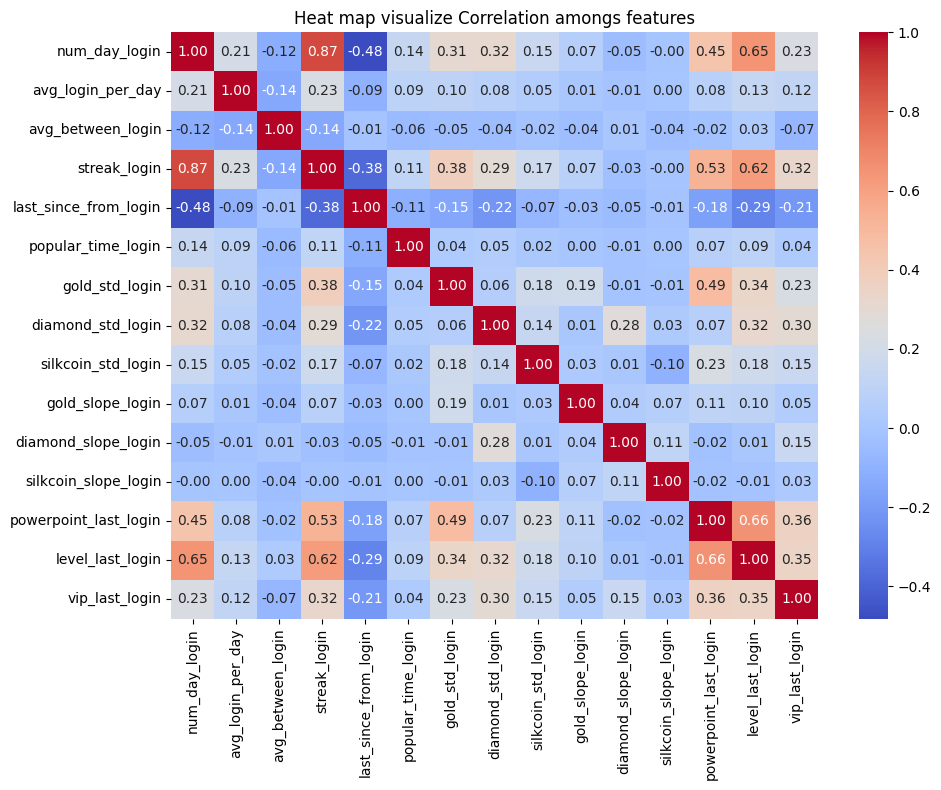

In [6]:
corr_cols = df_login.drop(columns=['vopenid','last_update_time']).columns

plt.figure(figsize=(10,8))
sns.heatmap(df_login[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat map visualize Correlation amongs features')
plt.tight_layout()
plt.show()

### **Prepare data and modeling**

In [7]:
X = df_login.drop(columns=['vopenid', 'last_update_time'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
z_scores = pd.DataFrame(np.abs(zscore(X_scaled)), columns=X.columns)
outlier_mask = (z_scores > 5).any(axis=1)

In [9]:
num_cluster = 3
df_login['kmeans_cluster'] = -1
df_login['gmm_cluster'] = -1
df_login['agglo_cluster'] = -1
df_login['spec_cluster'] = -1

#### **Kmeans**

In [10]:
kmeans = KMeans(n_clusters=num_cluster, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled[~outlier_mask])
df_login.loc[~outlier_mask, 'kmeans_cluster'] = kmeans_labels

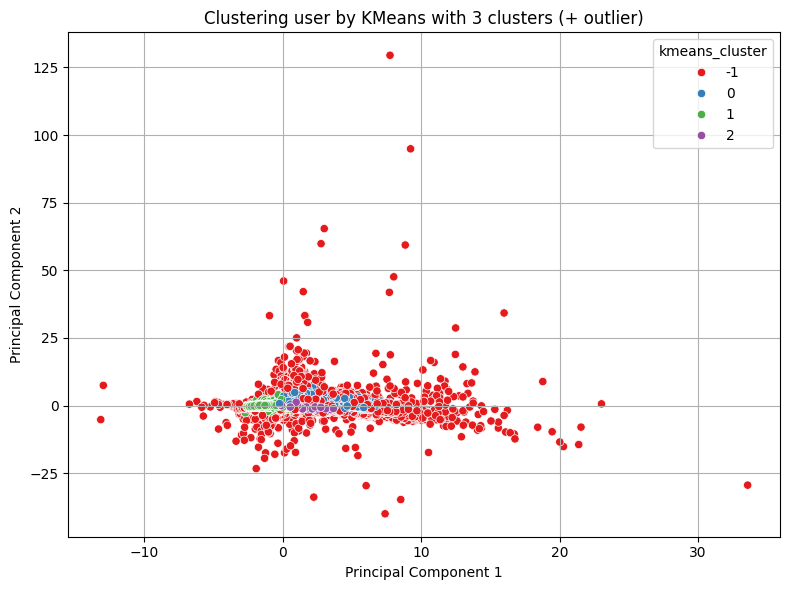

In [11]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_login['pca_kmean_1'] = pca_result[:, 0]
df_login['pca_kmean_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_login,
    x='pca_kmean_1', y='pca_kmean_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering user by KMeans with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
cluster_stats = df_login.groupby('kmeans_cluster')[
    [
       'num_day_login', 'avg_login_per_day',
       'avg_between_login', 'streak_login', 
       'last_since_from_login', 'popular_time_login', 
       'gold_std_login', 'diamond_std_login',
       'silkcoin_std_login', 'gold_slope_login', 
       'diamond_slope_login', 'silkcoin_slope_login',
       'powerpoint_last_login', 'level_last_login',
       'vip_last_login'
    ]   
].mean().round(2)

cluster_counts = df_login['kmeans_cluster'].value_counts().sort_index().rename('num_users')
total_users = cluster_counts.sum()
cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary = cluster_summary.sort_values(by='num_day_login', ascending=False)
cluster_summary

,num_day_login,avg_login_per_day,avg_between_login,streak_login,last_since_from_login,popular_time_login,gold_std_login,diamond_std_login,silkcoin_std_login,gold_slope_login,diamond_slope_login,silkcoin_slope_login,powerpoint_last_login,level_last_login,vip_last_login,num_users,percent_users
kmeans_cluster,,,,,,,,,,,,,,,,,
2,34.01,5.28,0.41,20.98,0.35,11.43,7174293.61,52.26,133.77,123936.63,-0.08,-0.20,3726003.08,47.19,0.00,60176,30.18
-1,28.92,10.02,3.22,24.80,1.45,10.70,79880946.59,90.15,995.65,452158.98,7.91,-3.00,18280358.38,61.51,1.11,7661,3.84
0,27.00,6.54,0.25,22.40,-1.43,11.17,15274457.47,97.15,281.86,231991.56,2.81,2.80,6890700.54,55.53,2.95,15190,7.62
1,5.65,3.38,0.62,3.26,11.74,9.80,451653.97,1.22,11.88,22890.86,0.00,0.04,473550.59,19.55,0.01,116343,58.36


#### **Gaussian Mixture**

In [13]:
gmm = GaussianMixture(n_components=num_cluster, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled[~outlier_mask])
df_login.loc[~outlier_mask, 'gmm_cluster'] = gmm_labels

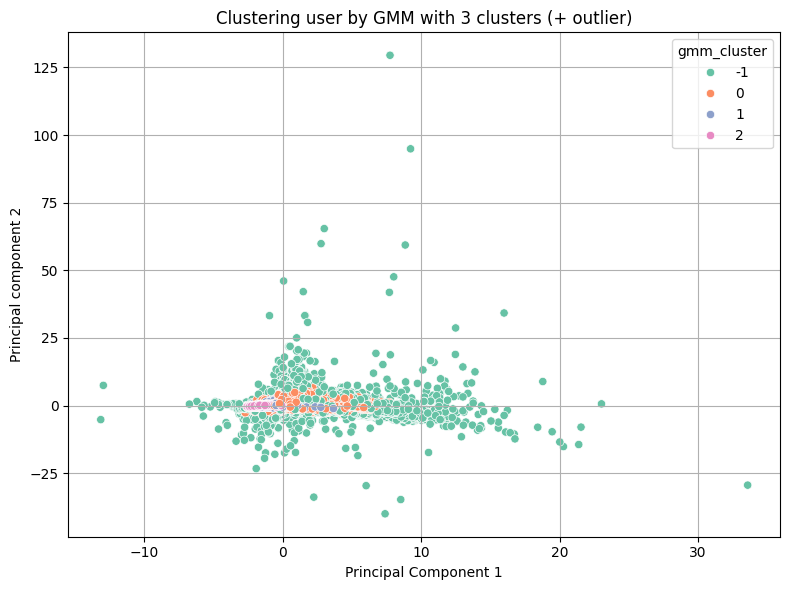

In [14]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_login['pca_gmm_1'] = pca_result[:, 0]
df_login['pca_gmm_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_login, x='pca_gmm_1', y='pca_gmm_2', hue='gmm_cluster', palette='Set2')
plt.title(f'Clustering user by GMM with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
cluster_stats = df_login.groupby('gmm_cluster')[
    [
       'num_day_login', 'avg_login_per_day',
       'avg_between_login', 'streak_login', 
       'last_since_from_login', 'popular_time_login', 
       'gold_std_login', 'diamond_std_login',
       'silkcoin_std_login', 'gold_slope_login', 
       'diamond_slope_login', 'silkcoin_slope_login',
       'powerpoint_last_login', 'level_last_login',
       'vip_last_login'
    ]   
].mean().round(2)

cluster_counts = df_login['gmm_cluster'].value_counts().sort_index().rename('num_users')
total_users = cluster_counts.sum()
cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary = cluster_summary.sort_values(by='num_day_login', ascending=False)
cluster_summary

,num_day_login,avg_login_per_day,avg_between_login,streak_login,last_since_from_login,popular_time_login,gold_std_login,diamond_std_login,silkcoin_std_login,gold_slope_login,diamond_slope_login,silkcoin_slope_login,powerpoint_last_login,level_last_login,vip_last_login,num_users,percent_users
kmeans_cluster,,,,,,,,,,,,,,,,,
2,34.01,5.28,0.41,20.98,0.35,11.43,7174293.61,52.26,133.77,123936.63,-0.08,-0.20,3726003.08,47.19,0.00,60176,30.18
-1,28.92,10.02,3.22,24.80,1.45,10.70,79880946.59,90.15,995.65,452158.98,7.91,-3.00,18280358.38,61.51,1.11,7661,3.84
0,27.00,6.54,0.25,22.40,-1.43,11.17,15274457.47,97.15,281.86,231991.56,2.81,2.80,6890700.54,55.53,2.95,15190,7.62
1,5.65,3.38,0.62,3.26,11.74,9.80,451653.97,1.22,11.88,22890.86,0.00,0.04,473550.59,19.55,0.01,116343,58.36


#### **Agglomerative**

In [16]:
# agglo = AgglomerativeClustering(n_clusters=num_cluster, linkage='ward')
# agglo_labels = agglo.fit_predict(X_scaled[~outlier_mask])
# df_login.loc[~outlier_mask, 'agglo_cluster'] = agglo_labels

In [17]:
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(X_scaled)

# df_login['pca_agglo_1'] = pca_result[:, 0]
# df_login['pca_agglo_2'] = pca_result[:, 1]

# plt.figure(figsize=(8, 6))
# sns.scatterplot(
#     data=df_login,
#     x='pca_agglo_1', y='pca_agglo_2',
#     hue='agglo_cluster', palette='Dark2'
# )
# plt.title(f'Clustering user by Agglomerative (ward) with {num_cluster} clusters (+ outlier)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [18]:
# cluster_stats = df_login.groupby('kmeans_cluster')[
#     [
#        'num_day_login', 'avg_login_per_day',
#        'avg_between_login', 'streak_login', 
#        'last_since_from_login', 'popular_time_login', 
#        'gold_std_login', 'diamond_std_login',
#        'silkcoin_std_login', 'gold_slope_login', 
#        'diamond_slope_login', 'silkcoin_slope_login',
#        'powerpoint_last_login', 'level_last_login',
#        'vip_last_login'
#     ]   
# ].mean().round(2)

# cluster_counts = df_login['kmeans_cluster'].value_counts().sort_index().rename('num_users')
# total_users = cluster_counts.sum()
# cluster_summary = cluster_stats.join(cluster_counts)
# cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
# cluster_summary = cluster_summary.sort_values(by='num_day_login', ascending=False)
# cluster_summary

#### **Spectral**

In [19]:
# spectral = SpectralClustering(n_clusters=num_cluster, affinity='nearest_neighbors', random_state=42)
# spectral_labels = spectral.fit_predict(X_scaled[~outlier_mask])
# df_login.loc[~outlier_mask, 'spec_cluster'] = spectral_labels

In [20]:
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(X_scaled)

# df_login['pca_spectral_1'] = pca_result[:, 0]
# df_login['pca_spectral_2'] = pca_result[:, 1]

# plt.figure(figsize=(8, 6))
# sns.scatterplot(
#     data=df_login,
#     x='pca_spectral_1', y='pca_spectral_2',
#     hue='spec_cluster', palette='Set2'
# )
# plt.title(f'Clustering user by Spectral Clustering with {num_cluster} clusters (+ outlier) - PCA view')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [21]:
# cluster_stats = df_login.groupby('kmeans_cluster')[
#     [
#        'num_day_login', 'avg_login_per_day',
#        'avg_between_login', 'streak_login', 
#        'last_since_from_login', 'popular_time_login', 
#        'gold_std_login', 'diamond_std_login',
#        'silkcoin_std_login', 'gold_slope_login', 
#        'diamond_slope_login', 'silkcoin_slope_login',
#        'powerpoint_last_login', 'level_last_login',
#        'vip_last_login'
#     ]   
# ].mean().round(2)

# cluster_counts = df_login['kmeans_cluster'].value_counts().sort_index().rename('num_users')
# total_users = cluster_counts.sum()
# cluster_summary = cluster_stats.join(cluster_counts)
# cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
# cluster_summary = cluster_summary.sort_values(by='num_day_login', ascending=False)
# cluster_summary

#### **Metrics and evaluating**

In [22]:
X_inlier = X_scaled[~outlier_mask]
ch_kmeans = calinski_harabasz_score(X_inlier, df_login.loc[~outlier_mask, 'kmeans_cluster'])
ch_gmm = calinski_harabasz_score(X_inlier, df_login.loc[~outlier_mask, 'gmm_cluster'])
# ch_agglo = calinski_harabasz_score(X_inlier, df_login.loc[~outlier_mask, 'agglo_cluster'])
# ch_spec = calinski_harabasz_score(X_inlier, df_login.loc[~outlier_mask, 'spec_cluster'])

print(f"KMeans Calinski–Harabasz Index: {ch_kmeans:.4f}")
print(f"GMM Calinski–Harabasz Index: {ch_gmm:.4f}")
# print(f"AGGLO Calinski–Harabasz Index: {ch_agglo:.4f}")
# print(f"SPECTRAL Calinski–Harabasz Index: {ch_spec:.4f}")

KMeans Calinski–Harabasz Index: 54061.4868
GMM Calinski–Harabasz Index: 30202.3011


In [23]:
X_inlier = X_scaled[~outlier_mask]
db_kmeans = davies_bouldin_score(X_inlier, df_login.loc[~outlier_mask, 'kmeans_cluster'])
db_gmm = davies_bouldin_score(X_inlier, df_login.loc[~outlier_mask, 'gmm_cluster'])
# db_agglo = davies_bouldin_score(X_inlier, df_login.loc[~outlier_mask, 'agglo_cluster'])
# db_spec = davies_bouldin_score(X_inlier, df_login.loc[~outlier_mask, 'spec_cluster'])

print(f"KMeans Davies–Bouldin Index: {db_kmeans:.4f}")
print(f"GMM Davies–Bouldin Index : {db_gmm:.4f}")
# print(f"AGGLO Davies–Bouldin Index : {db_agglo:.4f}")
# print(f"SPECTRAL Davies–Bouldin Index : {db_spec:.4f}")

KMeans Davies–Bouldin Index: 1.4923
GMM Davies–Bouldin Index : 2.6146


In [24]:
X_inlier = X_scaled[~outlier_mask]
score_kmeans = silhouette_score(X_inlier, df_login.loc[~outlier_mask, 'kmeans_cluster'])
score_gmm = silhouette_score(X_inlier, df_login.loc[~outlier_mask, 'gmm_cluster'])
# score_agglo = silhouette_score(X_inlier, df_login.loc[~outlier_mask, 'agglo_cluster'])
# score_spec = silhouette_score(X_inlier, df_login.loc[~outlier_mask, 'spec_cluster'])

print(f"KMeans Silhouette score : {score_kmeans:.4f}")
print(f"GMM Silhouette score: {score_gmm:.4f}")
# print(f"AGGLO Silhouette score: {score_agglo:.4f}")
# print(f"SPECTRAL Silhouette score: {score_spec:.4f}")

KMeans Silhouette score : 0.2814
GMM Silhouette score: 0.1634


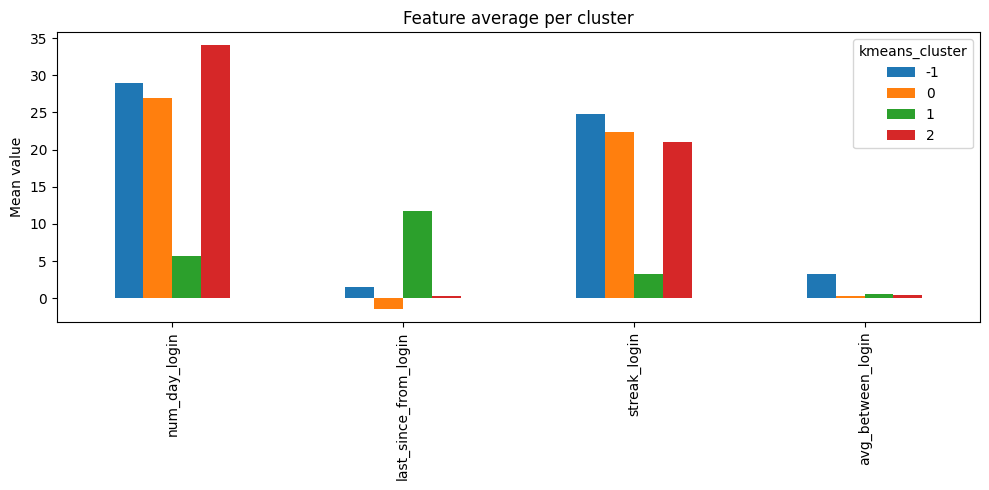

In [28]:
features = [ 'num_day_login', 'last_since_from_login','streak_login','avg_between_login']
df_login.groupby('kmeans_cluster')[features].mean().T.plot.bar(figsize=(10, 5))
plt.title('Feature average per cluster')
plt.ylabel('Mean value')
plt.tight_layout()
plt.show()

## **Purchase**

### **Read & explore data**

In [ ]:
df_purchase=pd.read_csv("../EDA_transform/data/purchase_transform.csv")
df_purchase

,vopenid,last_update_time,num_purchase,total_purchase,count_purchase_per_day,std_amount_purchase,max_purchase,days_since_last_purchase,num_product_buyed
0,2206211830166192,2025-05-24 15:48:36.757000+00:00,1,0.79,1.00,0.00,0.79,22,1
1,2210221534402190,2025-05-26 05:14:28.541000+00:00,1,7.88,1.00,0.00,7.88,21,1
2,2210221828089318,2025-06-11 14:06:52.646000+00:00,2,3.98,2.00,0.00,1.99,4,2
3,2302080453545458,2025-05-26 03:22:07.961000+00:00,2,3.98,1.00,0.00,1.99,21,2
4,2302141307530184,2025-06-12 07:24:17.135000+00:00,1,1.99,1.00,0.00,1.99,4,1
...,...,...,...,...,...,...,...,...,...
25620,6210000928471,2025-05-16 11:35:30.848000+00:00,1,1.99,1.00,0.00,1.99,30,1
25621,6210000940123,2025-05-20 13:08:05.375000+00:00,1,7.88,1.00,0.00,7.88,26,1
25622,6210001017824,2025-06-12 11:28:47.307000+00:00,2,3.98,1.00,0.00,1.99,3,1
25623,6220001331202,2025-06-12 14:39:00.448000+00:00,1,1.99,1.00,0.00,1.99,3,1


In [ ]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25625 entries, 0 to 25624
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vopenid                   25625 non-null  int64  
 1   last_update_time          25625 non-null  object 
 2   num_purchase              25625 non-null  int64  
 3   total_purchase            25625 non-null  float64
 4   count_purchase_per_day    25625 non-null  float64
 5   std_amount_purchase       25625 non-null  float64
 6   max_purchase              25625 non-null  float64
 7   days_since_last_purchase  25625 non-null  int64  
 8   num_product_buyed         25625 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 1.8+ MB


In [ ]:
df_purchase.describe()

,vopenid,num_purchase,total_purchase,count_purchase_per_day,std_amount_purchase,max_purchase,days_since_last_purchase,num_product_buyed
count,25625.00,25625.00,25625.00,25625.00,25625.00,25625.00,25625.00,25625.00
mean,2472698383911047.50,2.08,21.69,1.36,2.55,12.82,12.68,1.65
std,80680948999978.11,2.55,44.54,0.83,6.43,15.06,9.40,1.13
min,6200000000063.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,2410012005257677.00,1.00,7.88,1.00,0.00,7.88,4.00,1.00
50%,2503201816419835.00,1.00,15.75,1.00,0.00,9.99,11.00,1.00
75%,2505200008464397.00,2.00,23.63,1.50,5.30,15.75,21.00,2.00
max,2506152306178865.00,102.00,1917.00,10.00,215.67,360.00,32.00,15.00


In [ ]:
df_purchase['last_update_time'] = pd.to_datetime(df_purchase['last_update_time'], errors='coerce')

### **Visualize data**

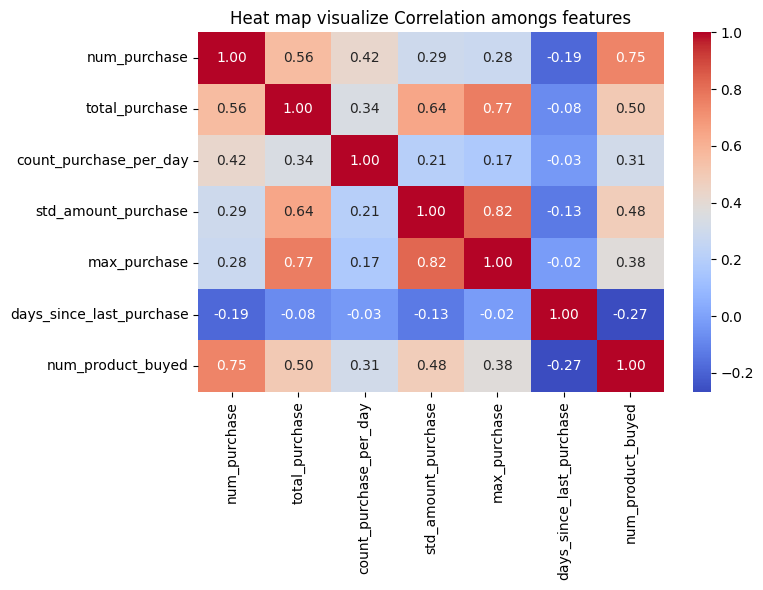

In [ ]:
corr_cols = df_purchase.drop(columns=['vopenid','last_update_time']).columns

plt.figure(figsize=(8,6))
sns.heatmap(df_purchase[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat map visualize Correlation amongs features')
plt.tight_layout()
plt.show()

### **Prepare data and modeling**

In [ ]:
X = df_purchase.drop(columns=['vopenid', 'last_update_time'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
z_scores = pd.DataFrame(np.abs(zscore(X_scaled)), columns=X.columns)
outlier_mask = (z_scores > 5).any(axis=1)

In [ ]:
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# isomap = Isomap(n_components=2)
# X_iso = isomap.fit_transform(X_scaled)

# residual_variance = 1 - np.corrcoef(X_pca.ravel(), X_iso.ravel())[0, 1]**2
# print(f"Residual Variance (Isomap vs PCA): {residual_variance:.4f}")

In [ ]:
num_cluster = 3
df_purchase['kmeans_cluster'] = -1
df_purchase['gmm_cluster'] = -1
df_purchase['agglo_cluster'] = -1
df_purchase['spec_cluster'] = -1

#### **Kmeans**

In [ ]:
kmeans = KMeans(n_clusters=num_cluster, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled[~outlier_mask])
df_purchase.loc[~outlier_mask, 'kmeans_cluster'] = kmeans_labels

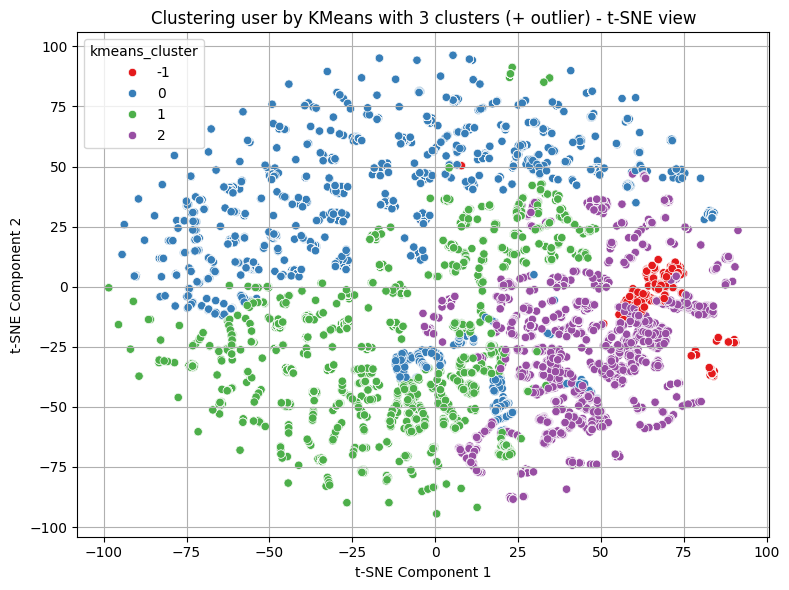

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

df_purchase['tsne_kmean_1'] = tsne_result[:, 0]
df_purchase['tsne_kmean_2'] = tsne_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_purchase,
    x='tsne_kmean_1', y='tsne_kmean_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering user by KMeans with {num_cluster} clusters (+ outlier) - t-SNE view')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

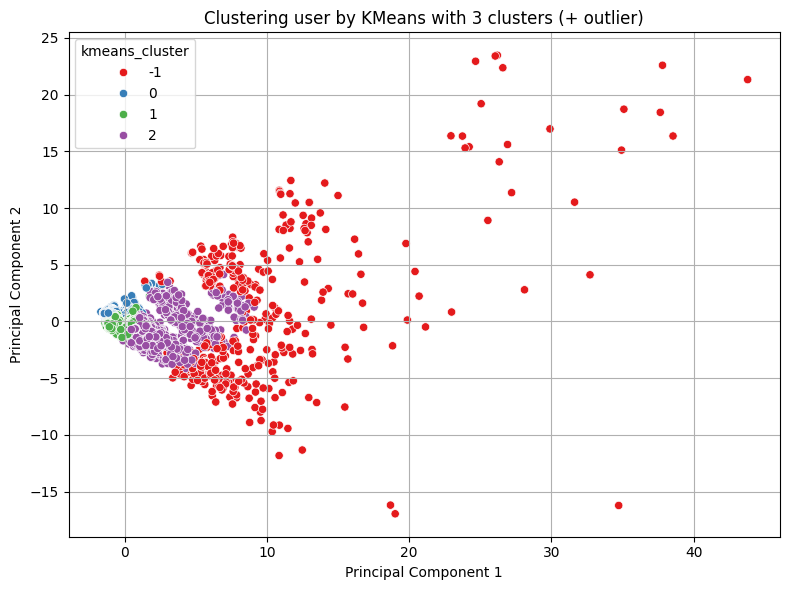

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_purchase['pca_kmean_1'] = pca_result[:, 0]
df_purchase['pca_kmean_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_purchase,
    x='pca_kmean_1', y='pca_kmean_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering user by KMeans with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
cluster_stats = df_purchase.groupby('kmeans_cluster')[
    [
        'num_purchase', 'total_purchase',
        'max_purchase',
        'num_product_buyed', 'days_since_last_purchase',
    ]   
].mean()

cluster_counts = df_purchase['kmeans_cluster'].value_counts().rename('num_users')

total_users = cluster_counts.sum()
total_money = cluster_stats['total_purchase'].sum()

cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary['percent_total_purchase'] = (cluster_summary['total_purchase'] / total_money * 100).round(2)

cluster_summary = cluster_summary.sort_values(by='total_purchase', ascending=False)
cluster_summary

,num_purchase,total_purchase,max_purchase,num_product_buyed,days_since_last_purchase,num_users,percent_users,percent_total_purchase
kmeans_cluster,,,,,,,,
-1,10.96,180.81,65.19,4.82,9.84,580,2.26,74.80
2,3.62,36.27,16.13,2.65,7.50,5951,23.22,15.00
0,1.28,13.34,11.34,1.23,22.84,9570,37.35,5.52
1,1.38,11.29,9.03,1.26,5.87,9524,37.17,4.67


#### **Gaussian Mixture**

In [ ]:
gmm = GaussianMixture(n_components=num_cluster, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled[~outlier_mask])
df_purchase.loc[~outlier_mask, 'gmm_cluster'] = gmm_labels

In [ ]:
# tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
# tsne_result = tsne.fit_transform(X_scaled)

# df_purchase['tsne_gmm_1'] = tsne_result[:, 0]
# df_purchase['tsne_gmm_2'] = tsne_result[:, 1]

# plt.figure(figsize=(8, 6))
# sns.scatterplot(
#     data=df_purchase,
#     x='tsne_gmm_1', y='tsne_gmm_2',
#     hue='gmm_cluster',
#     palette='Set2'
# )
# plt.title(f'Clustering user by GMM (t-SNE visualization) with {num_cluster} clusters (+ outlier)')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

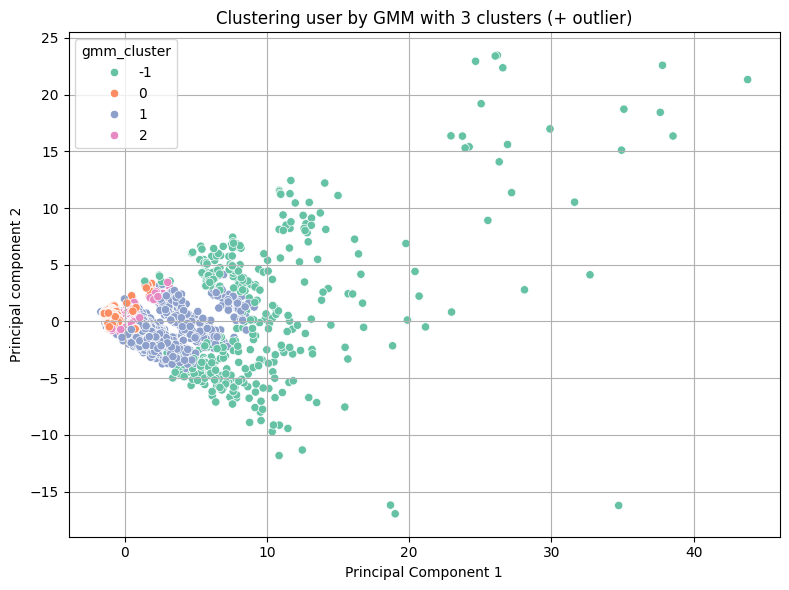

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_purchase['pca_gmm_1'] = pca_result[:, 0]
df_purchase['pca_gmm_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_purchase, x='pca_gmm_1', y='pca_gmm_2', hue='gmm_cluster', palette='Set2')
plt.title(f'Clustering user by GMM with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_purchase.columns

Index(['vopenid', 'last_update_time', 'num_purchase', 'total_purchase',
       'count_purchase_per_day', 'std_amount_purchase', 'max_purchase',
       'days_since_last_purchase', 'num_product_buyed', 'kmeans_cluster',
       'gmm_cluster', 'agglo_cluster', 'spec_cluster', 'tsne_kmean_1',
       'tsne_kmean_2', 'pca_kmean_1', 'pca_kmean_2', 'pca_gmm_1', 'pca_gmm_2'],
      dtype='object')

In [ ]:
cluster_stats = df_purchase.groupby('gmm_cluster')[
    [
        'num_purchase', 'total_purchase',
        'max_purchase',
        'num_product_buyed', 'days_since_last_purchase',
    ]   
].mean()

cluster_counts = df_purchase['gmm_cluster'].value_counts().rename('num_users')

total_users = cluster_counts.sum()
total_money = cluster_stats['total_purchase'].sum()

cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary['percent_total_purchase'] = (cluster_summary['total_purchase'] / total_money * 100).round(2)

cluster_summary = cluster_summary.sort_values(by='total_purchase', ascending=False)
cluster_summary

,num_purchase,total_purchase,max_purchase,num_product_buyed,days_since_last_purchase,num_users,percent_users,percent_total_purchase
gmm_cluster,,,,,,,,
-1,10.96,180.81,65.19,4.82,9.84,580,2.26,72.85
1,4.00,36.49,14.26,2.68,8.80,5267,20.55,14.70
2,2.00,19.03,12.35,1.85,9.68,3327,12.98,7.67
0,1.17,11.89,10.60,1.17,14.62,16451,64.20,4.79


#### **Agglomerative**

In [ ]:
# agglo = AgglomerativeClustering(n_clusters=num_cluster, linkage='ward')
# agglo_labels = agglo.fit_predict(X_scaled[~outlier_mask])
# df_purchase.loc[~outlier_mask, 'agglo_cluster'] = agglo_labels

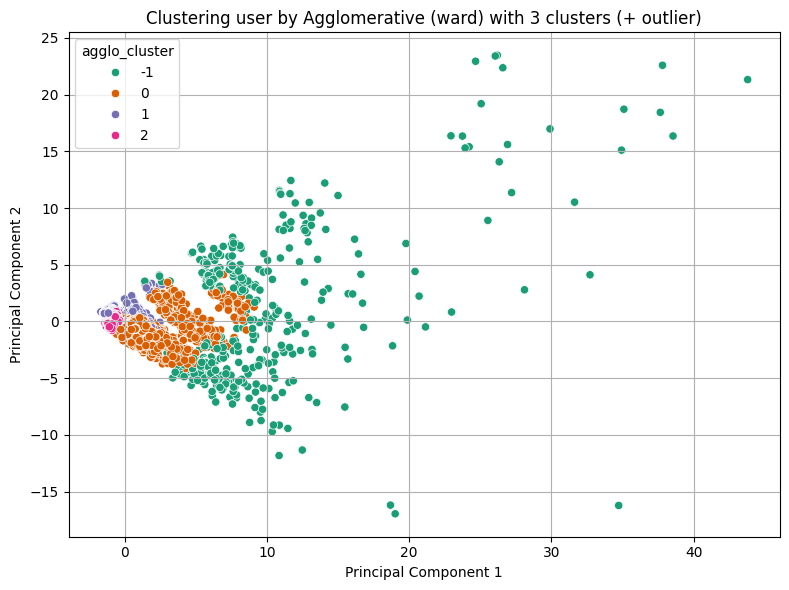

In [ ]:
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(X_scaled)

# df_purchase['pca_agglo_1'] = pca_result[:, 0]
# df_purchase['pca_agglo_2'] = pca_result[:, 1]

# plt.figure(figsize=(8, 6))
# sns.scatterplot(
#     data=df_purchase,
#     x='pca_agglo_1', y='pca_agglo_2',
#     hue='agglo_cluster', palette='Dark2'
# )
# plt.title(f'Clustering user by Agglomerative (ward) with {num_cluster} clusters (+ outlier)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# cluster_stats = df_purchase.groupby('agglo_cluster')[
#     [
#         'num_purchase', 'total_purchase',
#         'max_purchase',
#         'num_product_buyed', 'days_since_last_purchase',
#     ]   
# ].mean()

# cluster_counts = df_purchase['agglo_cluster'].value_counts().rename('num_users')

# total_users = cluster_counts.sum()
# total_money = cluster_stats['total_purchase'].sum()

# cluster_summary = cluster_stats.join(cluster_counts)
# cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
# cluster_summary['percent_total_purchase'] = (cluster_summary['total_purchase'] / total_money * 100).round(2)

# cluster_summary = cluster_summary.sort_values(by='total_purchase', ascending=False)
# cluster_summary

,num_purchase,total_purchase,max_purchase,num_product_buyed,days_since_last_purchase,num_users,percent_users,percent_total_purchase
agglo_cluster,,,,,,,,
-1,10.96,180.81,65.19,4.82,9.84,580,2.26,76.46
0,3.30,31.70,14.56,2.47,5.59,7513,29.32,13.40
1,1.43,14.85,11.89,1.36,23.03,9262,36.14,6.28
2,1.08,9.11,8.60,1.00,7.71,8270,32.27,3.85


#### **Spectral**

In [ ]:
# spectral = SpectralClustering(n_clusters=num_cluster, affinity='nearest_neighbors', random_state=42)
# spectral_labels = spectral.fit_predict(X_scaled[~outlier_mask])
# df_purchase.loc[~outlier_mask, 'spec_cluster'] = spectral_labels

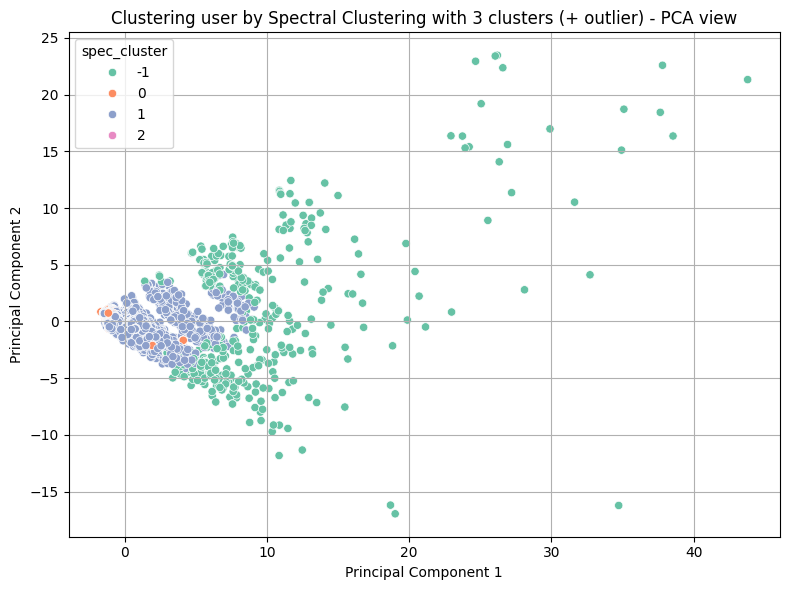

In [ ]:
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(X_scaled)

# df_purchase['pca_spectral_1'] = pca_result[:, 0]
# df_purchase['pca_spectral_2'] = pca_result[:, 1]

# plt.figure(figsize=(8, 6))
# sns.scatterplot(
#     data=df_purchase,
#     x='pca_spectral_1', y='pca_spectral_2',
#     hue='spec_cluster', palette='Set2'
# )
# plt.title(f'Clustering user by Spectral Clustering with {num_cluster} clusters (+ outlier) - PCA view')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
# cluster_stats = df_purchase.groupby('spec_cluster')[
#     [
#         'num_purchase', 'total_purchase',
#         'max_purchase',
#         'num_product_buyed', 'days_since_last_purchase',
#     ]   
# ].mean()

# cluster_counts = df_purchase['spec_cluster'].value_counts().rename('num_users')

# total_users = cluster_counts.sum()
# total_money = cluster_stats['total_purchase'].sum()

# cluster_summary = cluster_stats.join(cluster_counts)
# cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
# cluster_summary['percent_total_purchase'] = (cluster_summary['total_purchase'] / total_money * 100).round(2)

# cluster_summary = cluster_summary.sort_values(by='total_purchase', ascending=False)
# cluster_summary

,num_purchase,total_purchase,max_purchase,num_product_buyed,days_since_last_purchase,num_users,percent_users,percent_total_purchase
spec_cluster,,,,,,,,
-1,10.96,180.81,65.19,4.82,9.84,580,2.26,81.22
1,1.99,18.89,11.89,1.67,12.31,20916,81.62,8.48
0,1.30,14.49,10.51,1.12,15.07,3494,13.64,6.51
2,1.03,8.43,8.16,1.03,13.96,635,2.48,3.79


#### **Metrics Evaluation**

##### **1. Silhouette Score**

- Đánh giá mức độ gắn kết trong cụm và tách biệt giữa các cụm.
- Giá trị nằm trong khoảng `[-1, 1]`
- Gần **1** → điểm nằm gần tâm cụm của nó và xa cụm khác → tốt.
- Gần **0** → điểm nằm gần ranh giới giữa hai cụm.
- `< 0` → điểm có thể bị gán sai cụm.

**Công thức:**

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Trong đó:
- `a(i)` là khoảng cách trung bình từ điểm `i` đến các điểm khác trong cùng cụm.
- `b(i)` là khoảng cách trung bình từ điểm `i` đến các điểm ở cụm gần nhất khác.

##### **2. Davies–Bouldin Index (DBI)**

- Đo độ tương tự giữa các cụm (càng nhỏ càng tốt).
- DBI càng **thấp** → các cụm càng riêng biệt, càng gọn.
- DBI ≥ 0, không có giới hạn trên.

**Công thức:**

$$
DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right)
$$

Trong đó:
- `s_i` là độ phân tán trong cụm `i`
- `d_ij` là khoảng cách giữa hai tâm cụm `i` và `j`

##### **3. Calinski–Harabasz Index (CHI)**

- Đo tỷ lệ giữa độ phân tán giữa cụm và trong cụm (càng lớn càng tốt).

**Công thức:**

$$
CHI = \frac{Tr(B_k)}{Tr(W_k)} \cdot \frac{N - k}{k - 1}
$$

Trong đó:
- `Tr(B_k)` là tổng phương sai giữa các cụm
- `Tr(W_k)` là tổng phương sai trong cụm
- `N` là số điểm dữ liệu
- `k` là số cụm

In [ ]:
X_inlier = X_scaled[~outlier_mask]
score_kmeans = silhouette_score(X_inlier, df_purchase.loc[~outlier_mask, 'kmeans_cluster'])
score_gmm = silhouette_score(X_inlier, df_purchase.loc[~outlier_mask, 'gmm_cluster'])
# score_agglo = silhouette_score(X_inlier, df_purchase.loc[~outlier_mask, 'agglo_cluster'])
# score_spec = silhouette_score(X_inlier, df_purchase.loc[~outlier_mask, 'spec_cluster'])

print(f"KMeans Silhouette score : {score_kmeans:.4f}")
print(f"GMM Silhouette score: {score_gmm:.4f}")
# print(f"AGGLO Silhouette score: {score_agglo:.4f}")
# print(f"SPECTRAL Silhouette score: {score_agglo:.4f}")

KMeans Silhouette score : 0.3579
GMM Silhouette score: 0.1114
AGGLO Silhouette score: 0.3184
SPECTRAL Silhouette score: 0.3184


In [ ]:
X_inlier = X_scaled[~outlier_mask]
db_kmeans = davies_bouldin_score(X_inlier, df_purchase.loc[~outlier_mask, 'kmeans_cluster'])
db_gmm = davies_bouldin_score(X_inlier, df_purchase.loc[~outlier_mask, 'gmm_cluster'])
# db_agglo = davies_bouldin_score(X_inlier, df_purchase.loc[~outlier_mask, 'agglo_cluster'])
# db_spec = davies_bouldin_score(X_inlier, df_purchase.loc[~outlier_mask, 'spec_cluster'])

print(f"KMeans Davies–Bouldin Index: {db_kmeans:.4f}")
print(f"GMM Davies–Bouldin Index : {db_gmm:.4f}")
# print(f"AGGLO Davies–Bouldin Index : {db_agglo:.4f}")
# print(f"SPECTRAL Davies–Bouldin Index : {db_spec:.4f}")

KMeans Davies–Bouldin Index: 1.0978
GMM Davies–Bouldin Index : 2.0556
AGGLO Davies–Bouldin Index : 1.0933
SPECTRAL Davies–Bouldin Index : 5.3053


In [ ]:
X_inlier = X_scaled[~outlier_mask]
ch_kmeans = calinski_harabasz_score(X_inlier, df_purchase.loc[~outlier_mask, 'kmeans_cluster'])
ch_gmm = calinski_harabasz_score(X_inlier, df_purchase.loc[~outlier_mask, 'gmm_cluster'])
# ch_agglo = calinski_harabasz_score(X_inlier, df_purchase.loc[~outlier_mask, 'agglo_cluster'])
# ch_spec = calinski_harabasz_score(X_inlier, df_purchase.loc[~outlier_mask, 'spec_cluster'])

print(f"KMeans Calinski–Harabasz Index: {ch_kmeans:.4f}")
print(f"GMM Calinski–Harabasz Index: {ch_gmm:.4f}")
# print(f"AGGLO Calinski–Harabasz Index: {ch_agglo:.4f}")
# print(f"SPECTRAL Calinski–Harabasz Index: {ch_spec:.4f}")

KMeans Calinski–Harabasz Index: 11729.6496
GMM Calinski–Harabasz Index: 4511.6926
AGGLO Calinski–Harabasz Index: 9872.5489
SPECTRAL Calinski–Harabasz Index: 299.5346


## **Equipenhance**

### **Read & explore data**

In [2]:
df_equip=pd.read_csv("../EDA_transform/data/equipenhance_transform.csv")
df_equip

,vopenid,last_update_time,num_enhance,enhance_success_rate,max_enhance_level
0,2206111808105074,2025-06-15 14:53:06+00:00,2,1.00,2
1,2206111830413361,2025-06-16 06:01:59+00:00,79,0.65,7
2,2206112142566650,2025-06-17 03:34:01+00:00,14,0.79,2
3,2206131428405180,2025-06-13 03:56:37+00:00,1,1.00,1
4,2206141543270674,2025-06-10 14:35:30+00:00,2,0.00,0
...,...,...,...,...,...
55133,6220001341173,2025-06-08 06:12:13+00:00,4,0.75,2
55134,6220001406323,2025-06-17 14:14:40+00:00,5,0.40,1
55135,6220001449993,2025-06-13 07:30:53+00:00,4,0.75,2
55136,chungminhde,2025-06-18 11:14:52+00:00,16,0.69,5


In [3]:
df_equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55138 entries, 0 to 55137
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vopenid               55138 non-null  object 
 1   last_update_time      55138 non-null  object 
 2   num_enhance           55138 non-null  int64  
 3   enhance_success_rate  55138 non-null  float64
 4   max_enhance_level     55138 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ MB


In [4]:
df_equip.describe()

,num_enhance,enhance_success_rate,max_enhance_level
count,55138.00,55138.00,55138.00
mean,123.71,0.72,4.11
std,246.97,0.20,2.24
min,1.00,0.00,-1.00
25%,8.00,0.61,2.00
50%,32.00,0.71,4.00
75%,138.00,0.85,6.00
max,12899.00,1.00,16.00


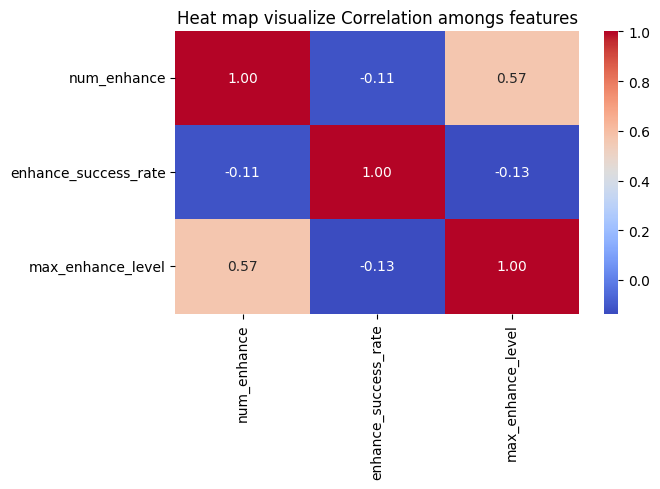

In [5]:
corr_cols = df_equip.drop(columns=['vopenid','last_update_time']).columns

plt.figure(figsize=(7,5))
sns.heatmap(df_equip[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat map visualize Correlation amongs features')
plt.tight_layout()
plt.show()

### **Prepare data and modeling**

In [6]:
X = df_equip.drop(columns=['vopenid', 'last_update_time'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
z_scores = pd.DataFrame(np.abs(zscore(X_scaled)), columns=X.columns)
outlier_mask = (z_scores > 5).any(axis=1)

In [8]:
num_cluster = 3
df_equip['kmeans_cluster'] = -1
df_equip['gmm_cluster'] = -1

#### **Kmeans**

In [9]:
kmeans = KMeans(n_clusters=num_cluster, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled[~outlier_mask])
df_equip.loc[~outlier_mask, 'kmeans_cluster'] = kmeans_labels

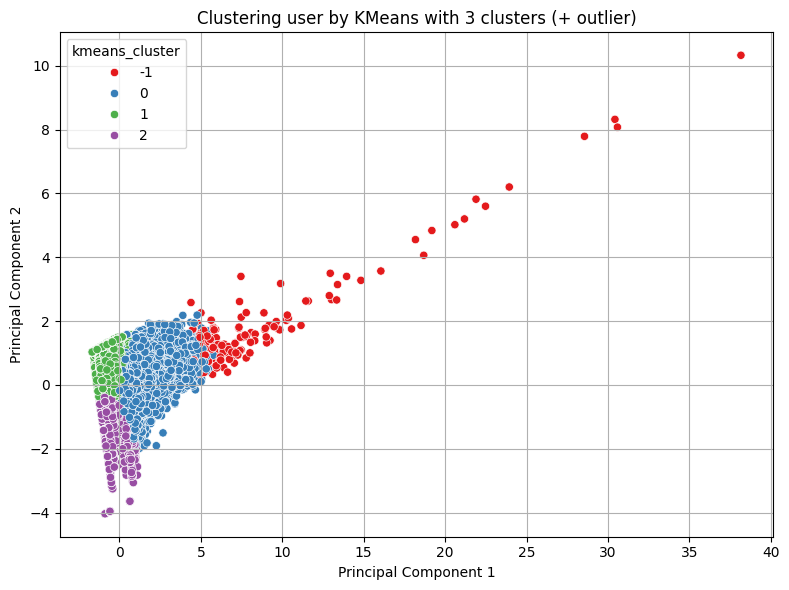

In [10]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_equip['pca_kmean_1'] = pca_result[:, 0]
df_equip['pca_kmean_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_equip,
    x='pca_kmean_1', y='pca_kmean_2',
    hue='kmeans_cluster', palette='Set1'
)
plt.title(f'Clustering user by KMeans with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
df_equip

,vopenid,last_update_time,num_enhance,enhance_success_rate,max_enhance_level,kmeans_cluster,gmm_cluster,pca_kmean_1,pca_kmean_2
0,2206111808105074,2025-06-15 14:53:06+00:00,2,1.00,2,1,-1,-1.37,1.11
1,2206111830413361,2025-06-16 06:01:59+00:00,79,0.65,7,0,-1,0.86,-0.17
2,2206112142566650,2025-06-17 03:34:01+00:00,14,0.79,2,1,-1,-1.04,0.07
3,2206131428405180,2025-06-13 03:56:37+00:00,1,1.00,1,1,-1,-1.68,1.03
4,2206141543270674,2025-06-10 14:35:30+00:00,2,0.00,0,2,-1,-0.58,-3.96
...,...,...,...,...,...,...,...,...,...
55133,6220001341173,2025-06-08 06:12:13+00:00,4,0.75,2,1,-1,-1.01,-0.12
55134,6220001406323,2025-06-17 14:14:40+00:00,5,0.40,1,2,-1,-0.83,-1.91
55135,6220001449993,2025-06-13 07:30:53+00:00,4,0.75,2,1,-1,-1.01,-0.12
55136,chungminhde,2025-06-18 11:14:52+00:00,16,0.69,5,0,-1,0.02,-0.18


In [14]:
cluster_stats = df_equip.groupby('kmeans_cluster')[
    [
       'num_enhance', 'enhance_success_rate',
       'max_enhance_level',
    ]   
].mean().round(2)

cluster_counts = df_equip['kmeans_cluster'].value_counts().sort_index().rename('num_users')
total_users = cluster_counts.sum()
cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary = cluster_summary.sort_values(by='num_enhance', ascending=False)
cluster_summary

,num_enhance,enhance_success_rate,max_enhance_level,num_users,percent_users
kmeans_cluster,,,,,
-1,2425.82,0.59,9.99,155,0.28
0,271.99,0.65,6.43,19705,35.74
1,35.12,0.87,3.03,24578,44.58
2,20.76,0.49,2.24,10700,19.41


#### **Gaussian Mixture**

In [15]:
gmm = GaussianMixture(n_components=num_cluster, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled[~outlier_mask])
df_equip.loc[~outlier_mask, 'gmm_cluster'] = gmm_labels

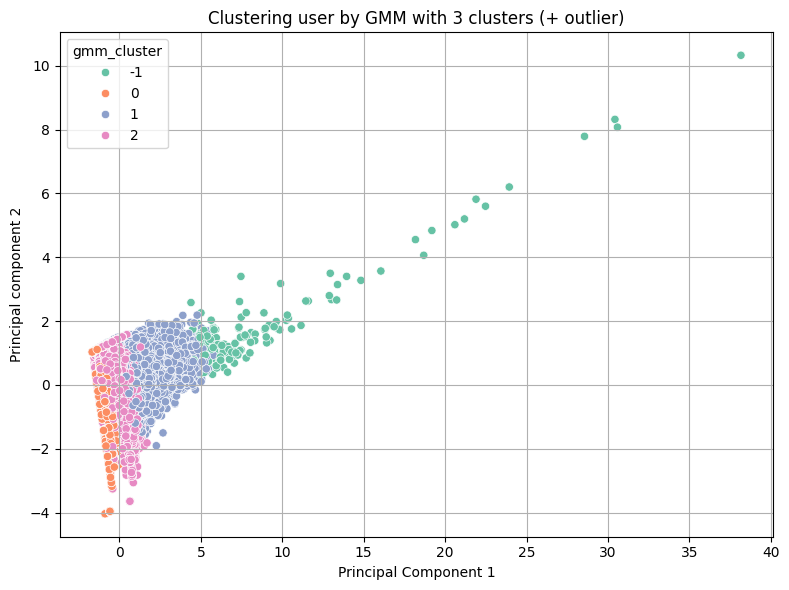

In [16]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_equip['pca_gmm_1'] = pca_result[:, 0]
df_equip['pca_gmm_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_equip, x='pca_gmm_1', y='pca_gmm_2', hue='gmm_cluster', palette='Set2')
plt.title(f'Clustering user by GMM with {num_cluster} clusters (+ outlier)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
cluster_stats = df_equip.groupby('gmm_cluster')[
    [
       'num_enhance', 'enhance_success_rate',
       'max_enhance_level',
    ]   
].mean().round(2)

cluster_counts = df_equip['gmm_cluster'].value_counts().sort_index().rename('num_users')
total_users = cluster_counts.sum()
cluster_summary = cluster_stats.join(cluster_counts)
cluster_summary['percent_users'] = (cluster_summary['num_users'] / total_users * 100).round(2)
cluster_summary = cluster_summary.sort_values(by='num_enhance', ascending=False)
cluster_summary

,num_enhance,enhance_success_rate,max_enhance_level,num_users,percent_users
gmm_cluster,,,,,
-1,2425.82,0.59,9.99,155,0.28
1,323.53,0.69,6.17,17289,31.36
2,34.57,0.72,4.10,22909,41.55
0,4.01,0.76,1.65,14785,26.81


#### **Metrics and evaluating**

In [21]:
X_inlier = X_scaled[~outlier_mask]
ch_kmeans = calinski_harabasz_score(X_inlier, df_equip.loc[~outlier_mask, 'kmeans_cluster'])
ch_gmm = calinski_harabasz_score(X_inlier, df_equip.loc[~outlier_mask, 'gmm_cluster'])

print(f"KMeans Calinski–Harabasz Index: {ch_kmeans:.4f}")
print(f"GMM Calinski–Harabasz Index: {ch_gmm:.4f}")

KMeans Calinski–Harabasz Index: 33439.6237
GMM Calinski–Harabasz Index: 15531.4442


In [22]:
X_inlier = X_scaled[~outlier_mask]
db_kmeans = davies_bouldin_score(X_inlier, df_equip.loc[~outlier_mask, 'kmeans_cluster'])
db_gmm = davies_bouldin_score(X_inlier, df_equip.loc[~outlier_mask, 'gmm_cluster'])

print(f"KMeans Davies–Bouldin Index: {db_kmeans:.4f}")
print(f"GMM Davies–Bouldin Index : {db_gmm:.4f}")

KMeans Davies–Bouldin Index: 0.9181
GMM Davies–Bouldin Index : 1.7659


In [23]:
X_inlier = X_scaled[~outlier_mask]
score_kmeans = silhouette_score(X_inlier, df_equip.loc[~outlier_mask, 'kmeans_cluster'])
score_gmm = silhouette_score(X_inlier, df_equip.loc[~outlier_mask, 'gmm_cluster'])

print(f"KMeans Silhouette score : {score_kmeans:.4f}")
print(f"GMM Silhouette score: {score_gmm:.4f}")

KMeans Silhouette score : 0.3717
GMM Silhouette score: 0.1686


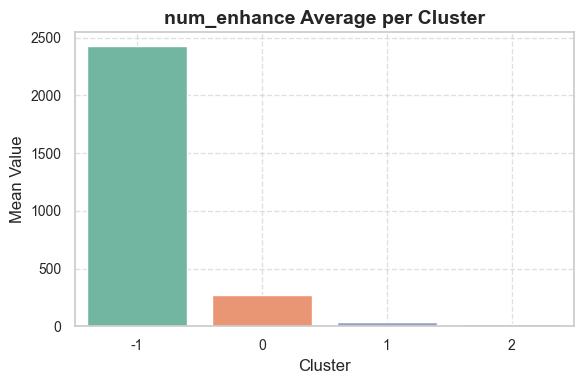

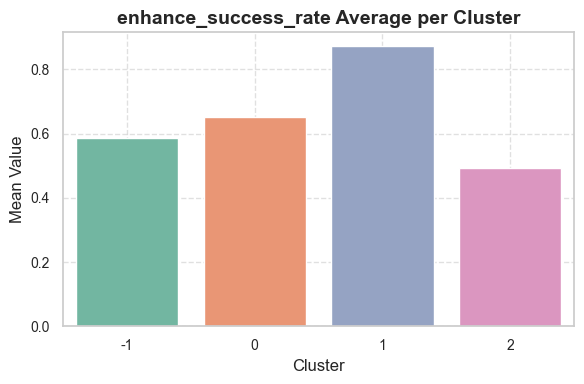

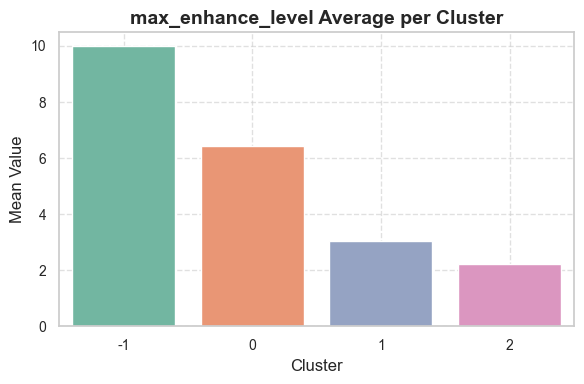

In [ ]:
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2")  

features = ['num_enhance', 'enhance_success_rate', 'max_enhance_level']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.barplot(
        x=df_equip['kmeans_cluster'],
        y=df_equip[feature],
        estimator='mean',
        palette=palette,
        errorbar=None  
    )
    plt.title(f'{feature} Average per Cluster', fontsize=14, weight='bold')
    plt.ylabel('Mean Value', fontsize=12)
    plt.xlabel('Cluster', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()